Given two corresponding sets of points from stereo images, 
compute the fundamental matrix. Explain its significance and 
visualize the epipolar lines on both images. 

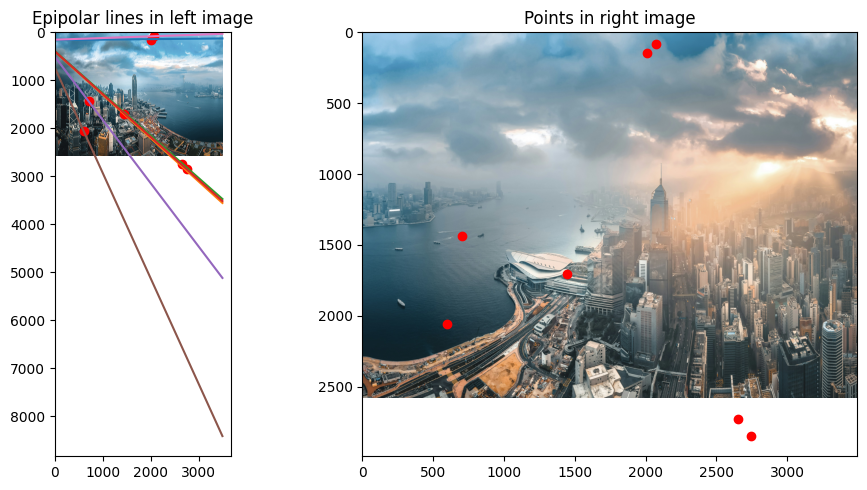

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load stereo image and split into left and right
img = cv2.imread('pan.jpg')
h, w = img.shape[:2]
img1, img2 = img[:, :w//2], img[:, w//2:]

# Simulate corresponding points
pts1 = np.random.randint(50, w//2 - 50, (10, 2)).astype(float)
pts2 = pts1 + np.random.normal(0, 2, pts1.shape)

# Compute fundamental matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
pts1, pts2 = pts1[mask.ravel()==1], pts2[mask.ravel()==1]

# Compute epipolar lines in the left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2, F).reshape(-1,3)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Epipolar lines in left image")
ax2.set_title("Points in right image")
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax1.scatter(pts1[:,0], pts1[:,1], color='red')
ax2.scatter(pts2[:,0], pts2[:,1], color='red')

# Draw epipolar lines
for r, pt1 in zip(lines1, pts1):
    x0, y0 = 0, int(-r[2]/r[1])
    x1, y1 = img1.shape[1], int(-(r[2] + r[0]*x1)/r[1])
    ax1.plot([x0, x1], [y0, y1])

plt.tight_layout()
plt.show()
